In [1]:
import pandas as pd
from pandas import DataFrame, read_csv, Series
import matplotlib.pyplot as plt
from helpers.dslabs_functions import plot_bar_chart, get_variable_types, define_grid, HEIGHT, plot_multibar_chart, NR_STDEV, IQR_FACTOR, determine_outlier_thresholds_for_var,count_outliers, set_chart_labels, plot_multiline_chart,  plot_multi_scatters_chart
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('../../datasets/class_credit_score.csv')

c:\Users\Ana\Desktop\github-projects\Data-Science-project\labs\preparation\helpers\dslabs_functions.py:197: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[c] = to_datetime(df[c], errors='raise')
c:\Users\Ana\Desktop\github-projects\Data-Science-project\labs\preparation\helpers\dslabs_functions.py:197: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[c] = to_datetime(df[c], errors='raise')
c:\Users\Ana\Desktop\github-projects\Data-Science-project\labs\preparation\helpers\dslabs_functions.py:197: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[c] = to_datetime(df[c], error

KeyboardInterrupt: 

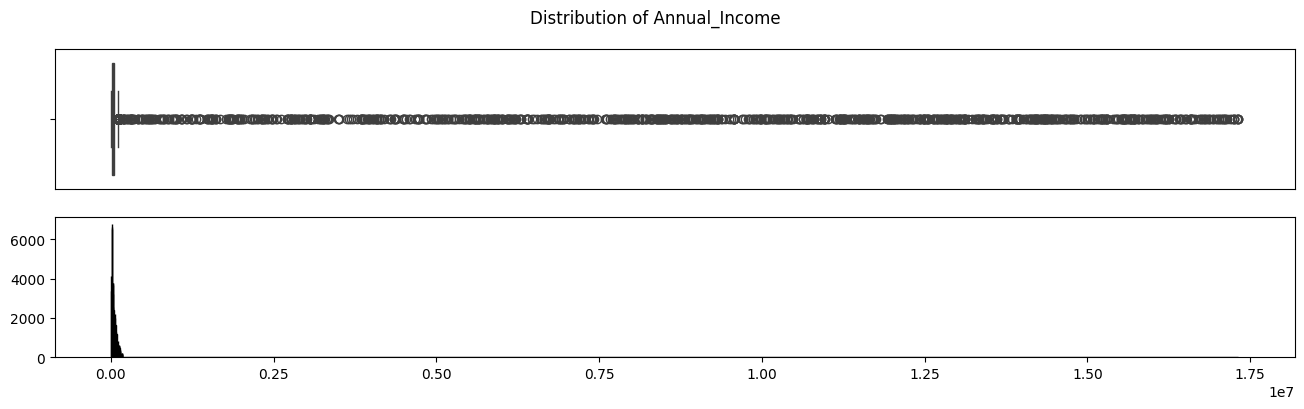

In [3]:
variables_types: dict[str, list] = get_variable_types(df)
numeric: list[str] = variables_types["numeric"]

for col in numeric:
  fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16, 4))
  plt.suptitle(f"Distribution of {col}")
  sns.boxplot(data=df, x=col, ax=ax1)
  ax1.set_xlabel(None)
  ax1.get_xaxis().set_ticks([])
  sns.histplot(data=df, x=col, ax=ax2)
  plt.subplots_adjust(hspace=0)
  print("\n")
  plt.show()

In [4]:
df[numeric].describe().T

,count,mean,std,min,25%,50%,75%,max
Annual_Income,100000.0,1.764157e+05,1.429618e+06,7.005930e+03,19457.500000,37578.610000,72790.920000,2.419806e+07
Monthly_Inhand_Salary,84998.0,4.194171e+03,3.183686e+03,3.036454e+02,1625.568229,3093.745000,5957.448333,1.520463e+04
Num_Bank_Accounts,100000.0,1.709128e+01,1.174048e+02,-1.000000e+00,3.000000,6.000000,7.000000,1.798000e+03
Num_Credit_Card,100000.0,2.247443e+01,1.290574e+02,0.000000e+00,4.000000,5.000000,7.000000,1.499000e+03
Interest_Rate,100000.0,7.246604e+01,4.664226e+02,1.000000e+00,8.000000,13.000000,20.000000,5.797000e+03
NumofLoan,100000.0,3.009960e+00,6.264788e+01,-1.000000e+02,1.000000,3.000000,5.000000,1.496000e+03
Delay_from_due_date,100000.0,2.106878e+01,1.486010e+01,-5.000000e+00,10.000000,18.000000,28.000000,6.700000e+01
NumofDelayedPayment,92998.0,3.092334e+01,2.260319e+02,-3.000000e+00,9.000000,14.000000,18.000000,4.397000e+03
ChangedCreditLimit,97909.0,1.038903e+01,6.789496e+00,-6.490000e+00,5.320000,9.400000,14.870000,3.697000e+01
NumCreditInquiries,98035.0,2.775425e+01,1.931773e+02,0.000000e+00,3.000000,6.000000,9.000000,2.597000e+03


In [5]:
outliers: dict[str, int] = count_outliers(df, numeric, nrstdev=2, iqrfactor=1.5)
outliers

{'iqr': [2783,
  1683,
  1315,
  2271,
  2034,
  4348,
  4002,
  736,
  668,
  1650,
  5272,
  4,
  6795,
  10096,
  7636],
 'stdev': [883,
  4773,
  1137,
  1826,
  1679,
  432,
  6931,
  663,
  5051,
  1407,
  6800,
  1200,
  2464,
  4305,
  9]}

In [6]:
for col in numeric:
  Q1, Q3 = df[col].quantile([0.25,0.75])
  IQR = Q3 - Q1
  right = Q3 + 1.5 * IQR
  left = Q1 - 1.5 * IQR
  n = len(df.loc[(df[col] < left) | (df[col] > right)])
  print(f"{col}:\n\tOutlier Num = {n}\n\tOutlier Percentage = {n*100/len(df):.2f}%\n")

Annual_Income:
	Outlier Num = 2783
	Outlier Percentage = 2.78%

Monthly_Inhand_Salary:
	Outlier Num = 1683
	Outlier Percentage = 1.68%

Num_Bank_Accounts:
	Outlier Num = 1315
	Outlier Percentage = 1.31%

Num_Credit_Card:
	Outlier Num = 2271
	Outlier Percentage = 2.27%

Interest_Rate:
	Outlier Num = 2034
	Outlier Percentage = 2.03%

NumofLoan:
	Outlier Num = 4348
	Outlier Percentage = 4.35%

Delay_from_due_date:
	Outlier Num = 4002
	Outlier Percentage = 4.00%

NumofDelayedPayment:
	Outlier Num = 736
	Outlier Percentage = 0.74%

ChangedCreditLimit:
	Outlier Num = 668
	Outlier Percentage = 0.67%

NumCreditInquiries:
	Outlier Num = 1650
	Outlier Percentage = 1.65%

OutstandingDebt:
	Outlier Num = 5272
	Outlier Percentage = 5.27%

CreditUtilizationRatio:
	Outlier Num = 4
	Outlier Percentage = 0.00%

TotalEMIpermonth:
	Outlier Num = 6795
	Outlier Percentage = 6.79%

Amountinvestedmonthly:
	Outlier Num = 10096
	Outlier Percentage = 10.10%

MonthlyBalance:
	Outlier Num = 7636
	Outlier Percenta

- Annual_Income: outliers stand out from the population and are removed from data
- Monthly_Inhand_Salary: 
- Num_Bank_Accounts: 
- Num_Credit_Card: 
- Interest_Rate: 
- Num_of_Loan: 
- Delay_from_due_date: 
- Num_of_Delayed_Payment: 
- Changed_Credit_Limit:
- Num_Credit_Inquiries: 
- Outstanding_Debt: 
- Credit_Utilization_Ratio: 
- Total_EMI_per_month: 
- Amount_invested_monthly: 
- Monthly_Balance: outliers are removed

In [7]:
vars_drop_outliers = [
 'Annual_Income',
 'MonthlyBalance',
 'NumofDelayedPayment'
 ]

In [8]:
def drop_outliers(df, cols, path_end_file, std: bool = True, thres: int=NR_STDEV):
    print(f"Original data: {df.shape}")
    if cols is not None:
        data: DataFrame = df.copy(deep=True)
        summary5: DataFrame = data[cols].describe()
        for var in cols:
            top_threshold, bottom_threshold = determine_outlier_thresholds_for_var(
                summary5[var], std_based = std, threshold = thres
            )
        
            outliers: Series = data[(data[var] > top_threshold) | (data[var] < bottom_threshold)]
            print(outliers.shape)
            n = len(data.loc[(data[var] > top_threshold) | (data[var] < bottom_threshold)])
            print(n)
            data.drop(outliers.index, axis=0, inplace=True)

        data.to_csv(f"drop_{path_end_file}", index=True)
        return(print(f"Data after dropping outliers: {data.shape}"))
    
    else:
        return(print("There are no numeric variables"))

In [9]:
drop_outliers(df, vars_drop_outliers, 'outliers_services.csv', std = False, thres = IQR_FACTOR)

Original data: (100000, 28)
(2783, 28)
2783
(6376, 28)
6376
(660, 28)
660
Data after dropping outliers: (90181, 28)


In [10]:
other_values = list(set(numeric) - set(vars_drop_outliers))

In [11]:
def replace_outliers(df, cols, path_end_file, std: bool = True, thres: int=NR_STDEV):
    print(f"Original data: {df.shape}")
    if cols is not None:
        data: DataFrame = df.copy(deep=True)
        summary5: DataFrame = data[cols].describe()
        for var in cols:
            top_threshold, bottom_threshold = determine_outlier_thresholds_for_var(
                summary5[var], std_based = std, threshold = thres
            )

            n = len(data.loc[(data[var] > top_threshold) | (data[var] < bottom_threshold)])
            print(n)

            median: float = data[var].median()
            data[var] = data[var].apply(lambda x: median if x > top_threshold or x < bottom_threshold else x)

        data.to_csv(f"replace_{path_end_file}", index=True)
        return(print(f"Data after dropping outliers: {data.shape}"))
    
    else:
        return(print("There are no numeric variables"))

In [12]:
print(other_values)

['Num_Credit_Card', 'ChangedCreditLimit', 'Delay_from_due_date', 'OutstandingDebt', 'Monthly_Inhand_Salary', 'Amountinvestedmonthly', 'NumofLoan', 'Interest_Rate', 'TotalEMIpermonth', 'NumCreditInquiries', 'CreditUtilizationRatio', 'Num_Bank_Accounts']


In [13]:
replace_outliers(pd.read_csv('drop_outliers_services.csv'), other_values, 'drop_outliers_services.csv', std = False, thres = IQR_FACTOR)

Original data: (90181, 29)
2037
251
2844
3647
1465
9295
3939
1845
6379
1481
0
1199
Data after dropping outliers: (90181, 29)


In [14]:
df3 = pd.read_csv('replace_drop_outliers_services.csv')
df3[numeric].describe().T

,count,mean,std,min,25%,50%,75%,max
Annual_Income,90181.0,43532.047658,30748.214647,7005.930000,18623.230000,34435.820000,61955.820000,152574.760000
Monthly_Inhand_Salary,76718.0,3458.433411,2322.463325,303.645417,1559.176667,2874.226667,4986.582500,10568.503330
Num_Bank_Accounts,90181.0,5.535479,2.548152,-1.000000,4.000000,6.000000,8.000000,11.000000
Num_Credit_Card,90181.0,5.633814,2.053726,0.000000,4.000000,6.000000,7.000000,11.000000
Interest_Rate,90181.0,15.091139,8.709504,1.000000,8.000000,15.000000,20.000000,34.000000
NumofLoan,90181.0,3.685100,2.392523,0.000000,2.000000,3.000000,5.000000,9.000000
Delay_from_due_date,90181.0,20.554197,13.381018,-5.000000,10.000000,19.000000,27.000000,57.000000
NumofDelayedPayment,83823.0,13.720638,6.215466,-3.000000,9.000000,14.000000,18.000000,28.000000
ChangedCreditLimit,88312.0,10.596723,6.774626,-6.490000,5.550000,9.620000,15.260000,29.990000
NumCreditInquiries,88431.0,6.020411,3.848787,0.000000,3.000000,6.000000,9.000000,17.000000


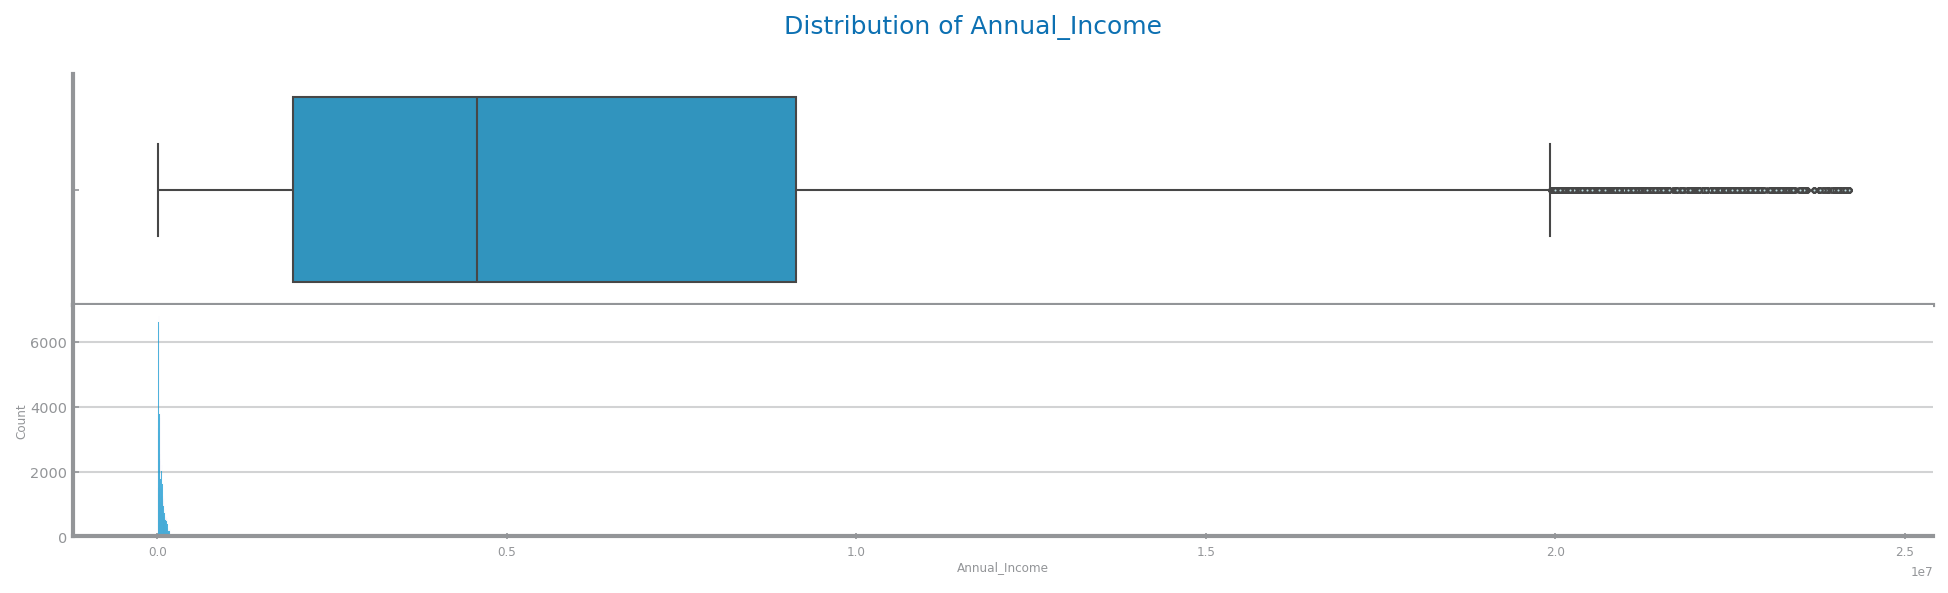

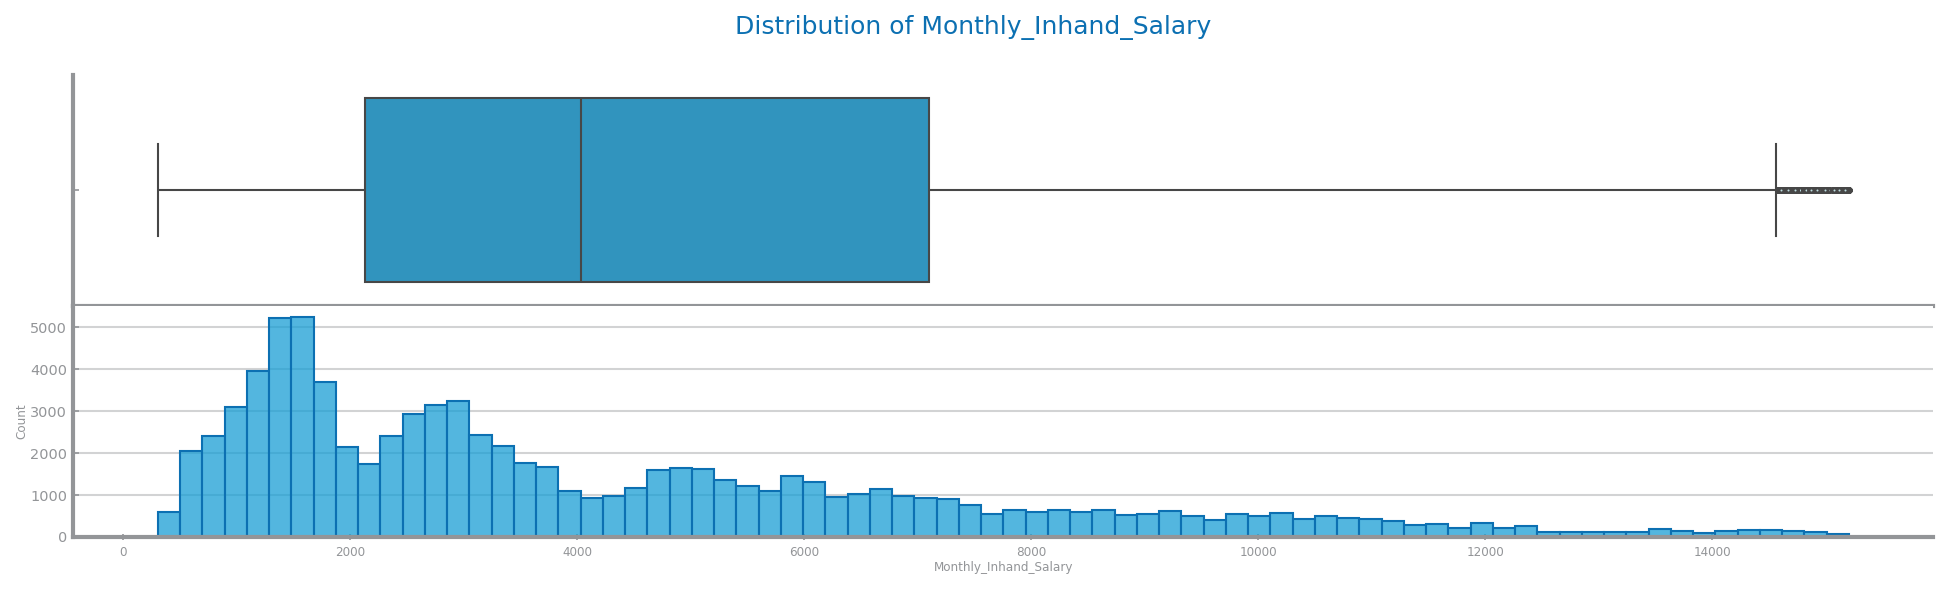

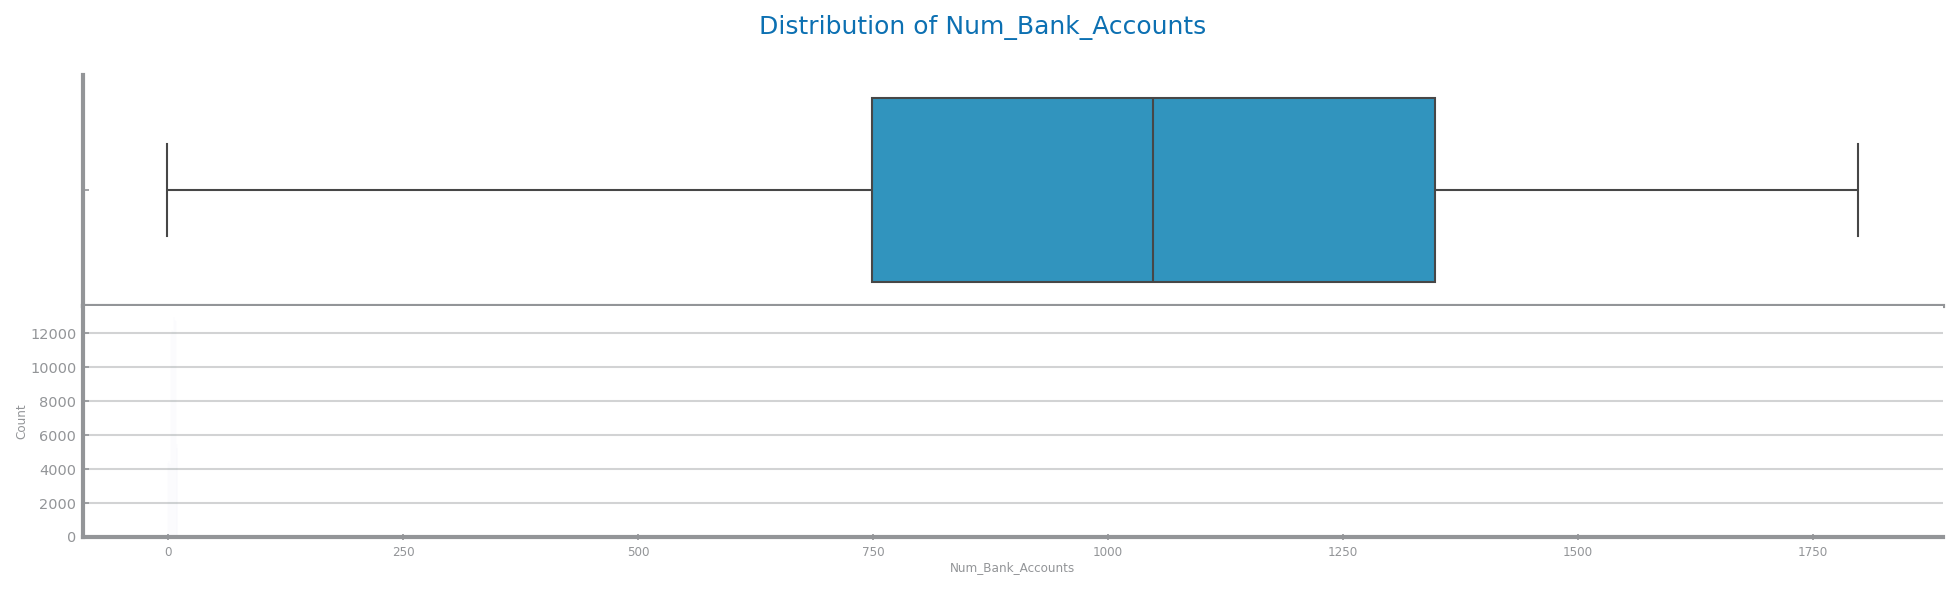

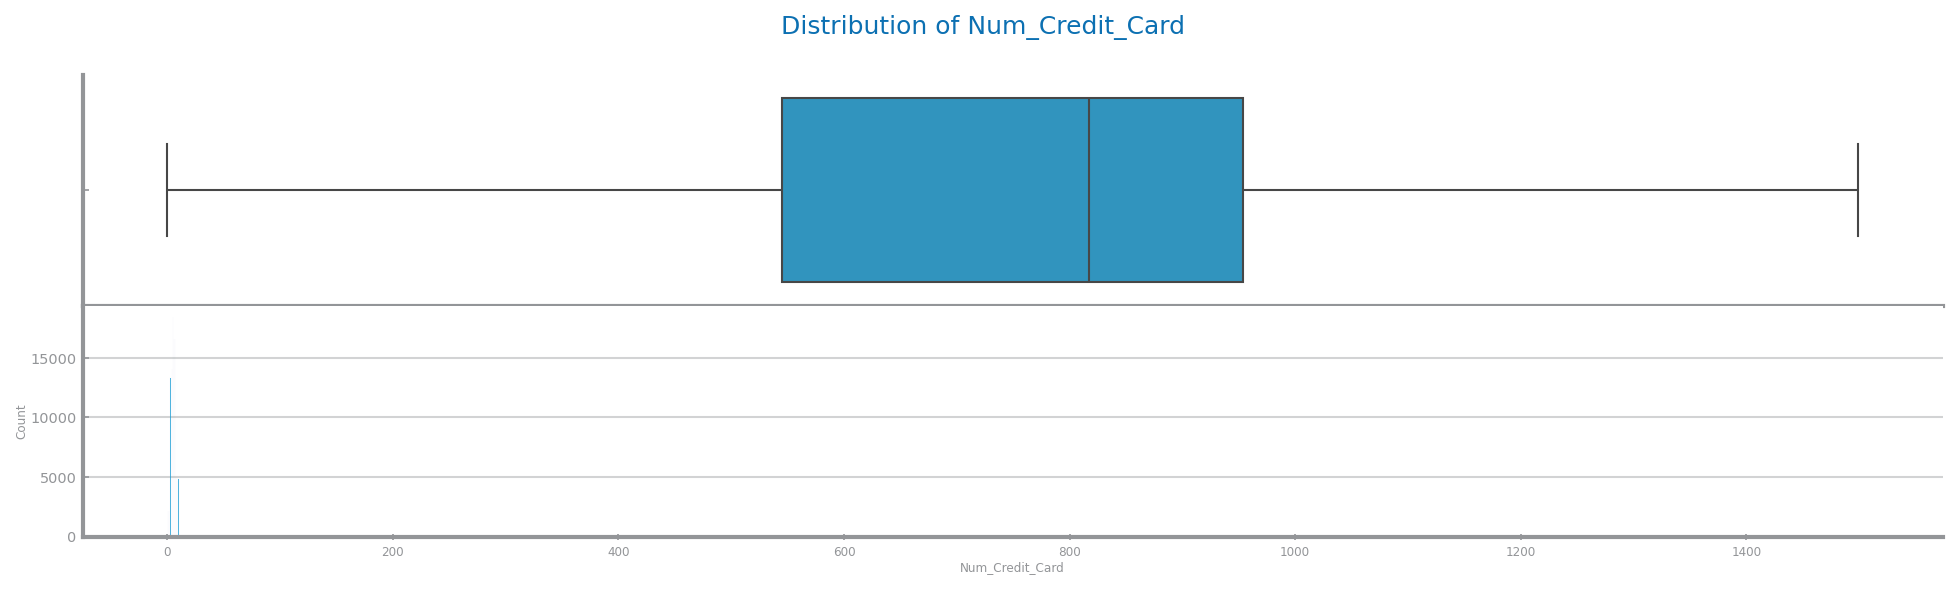

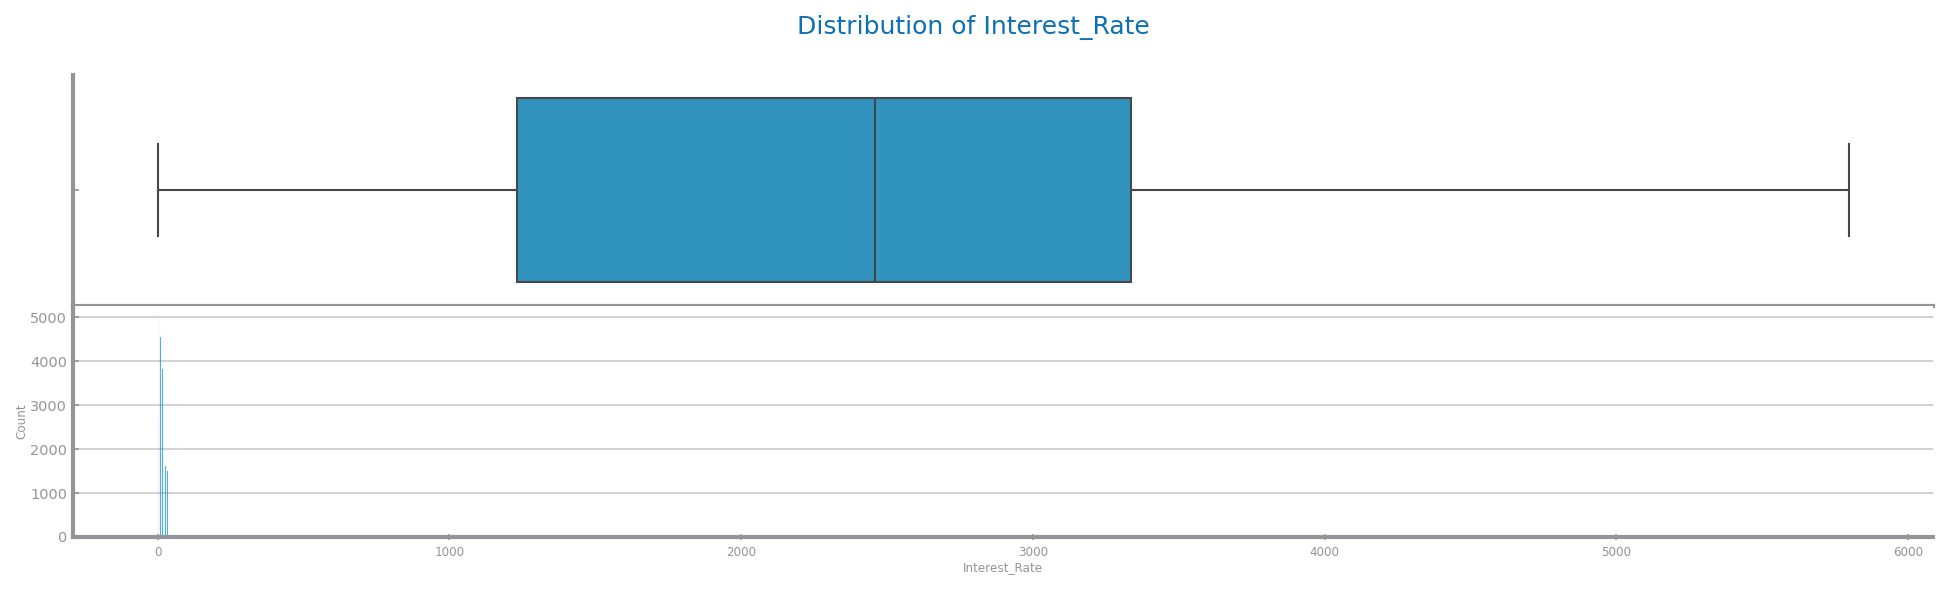

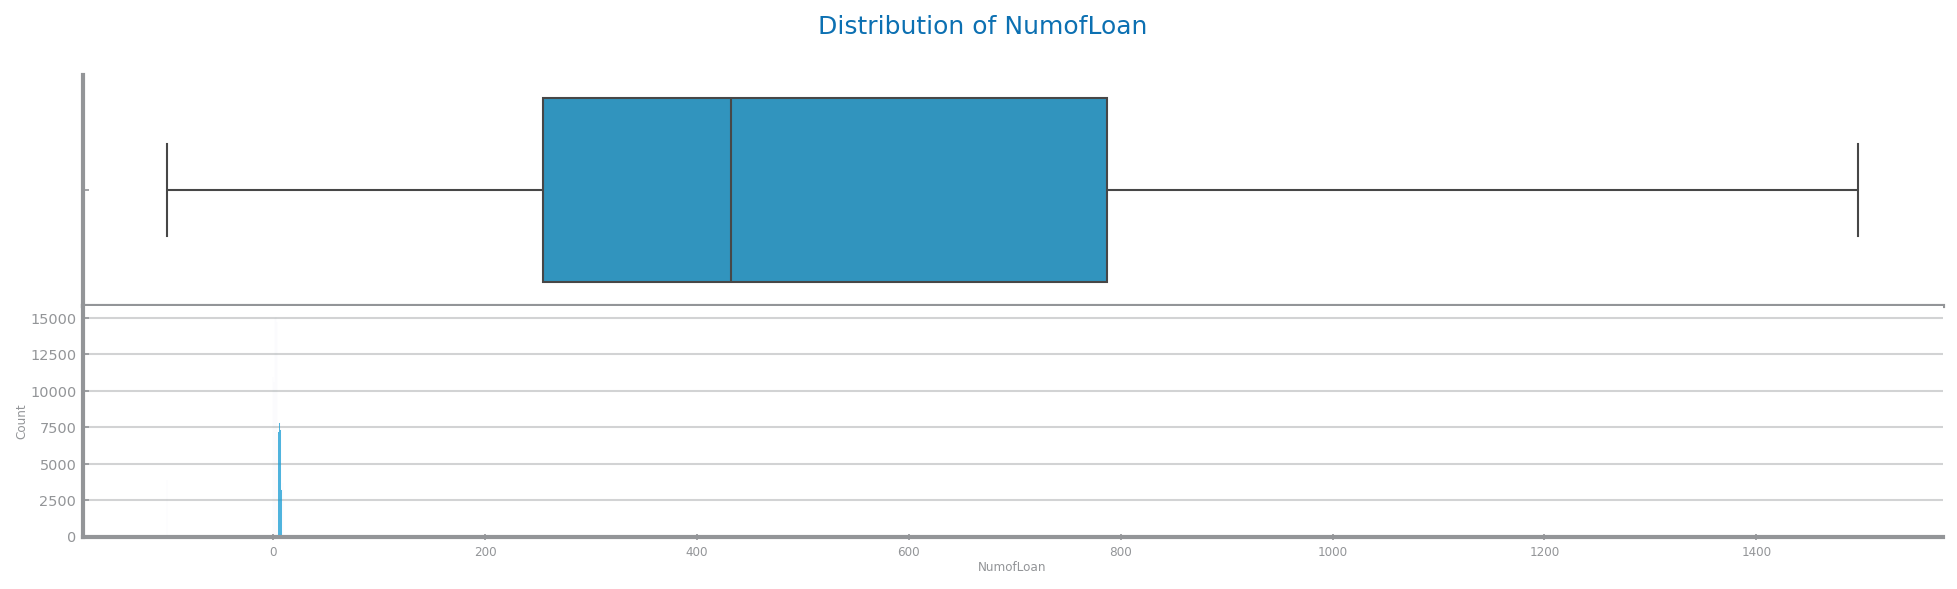

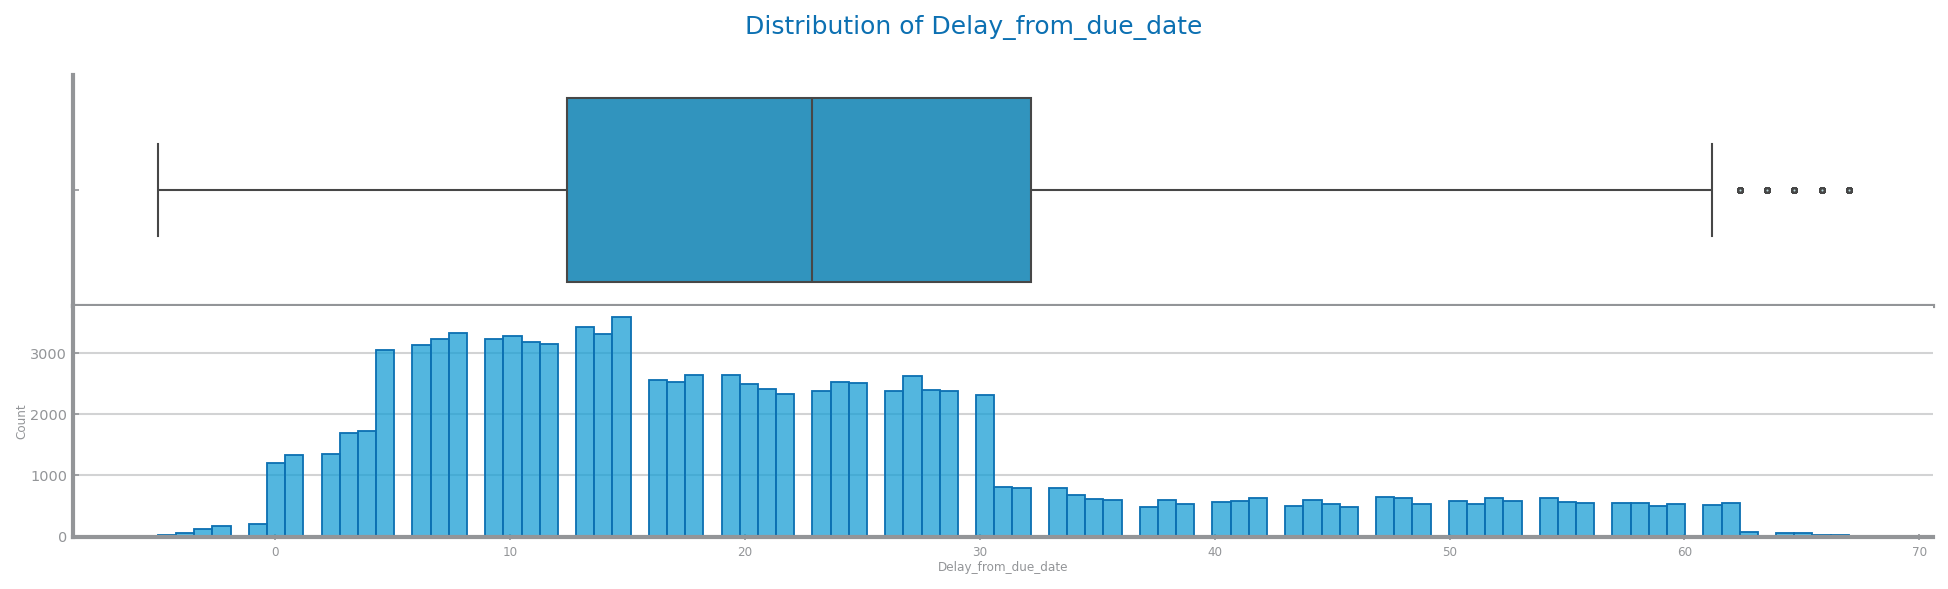

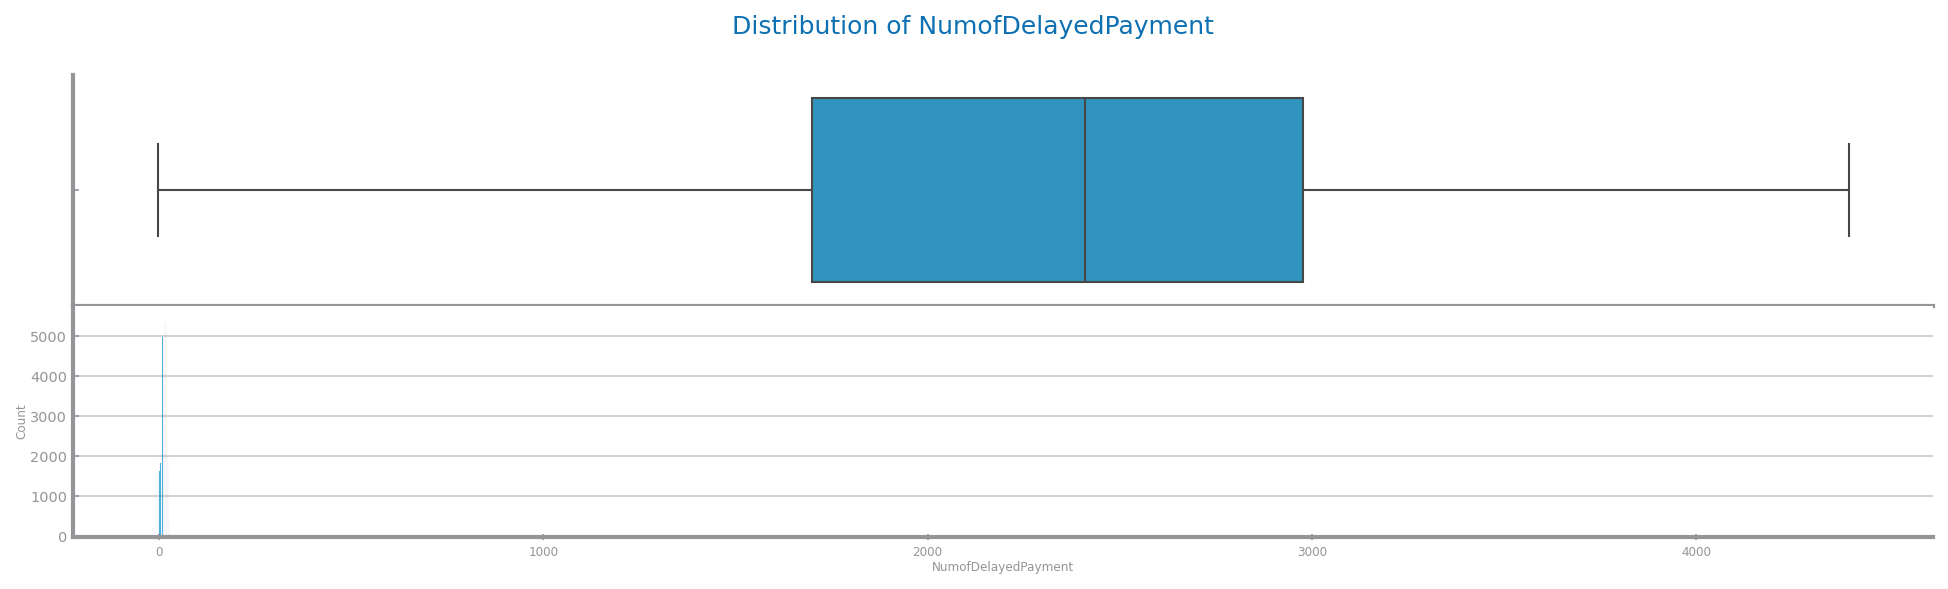

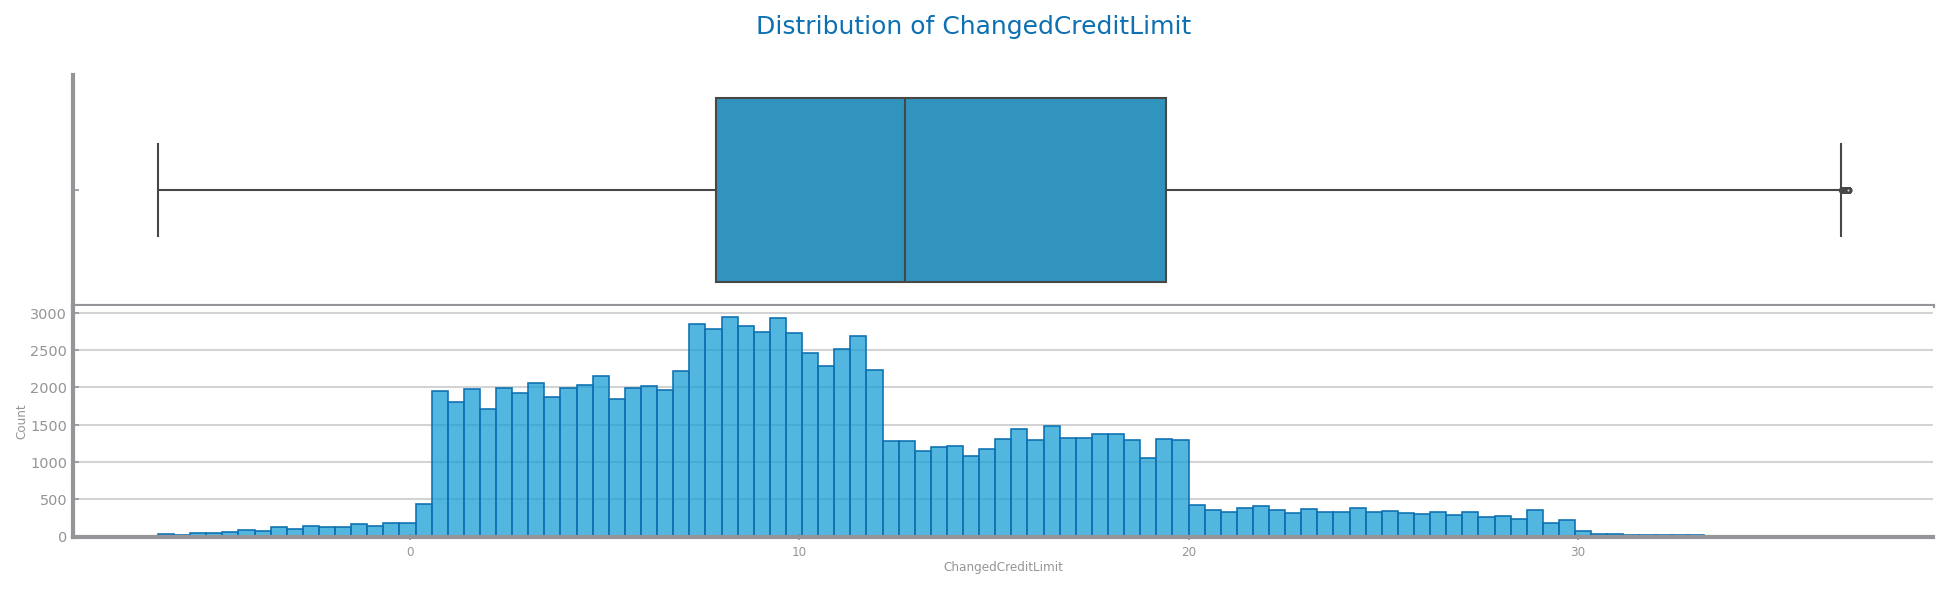

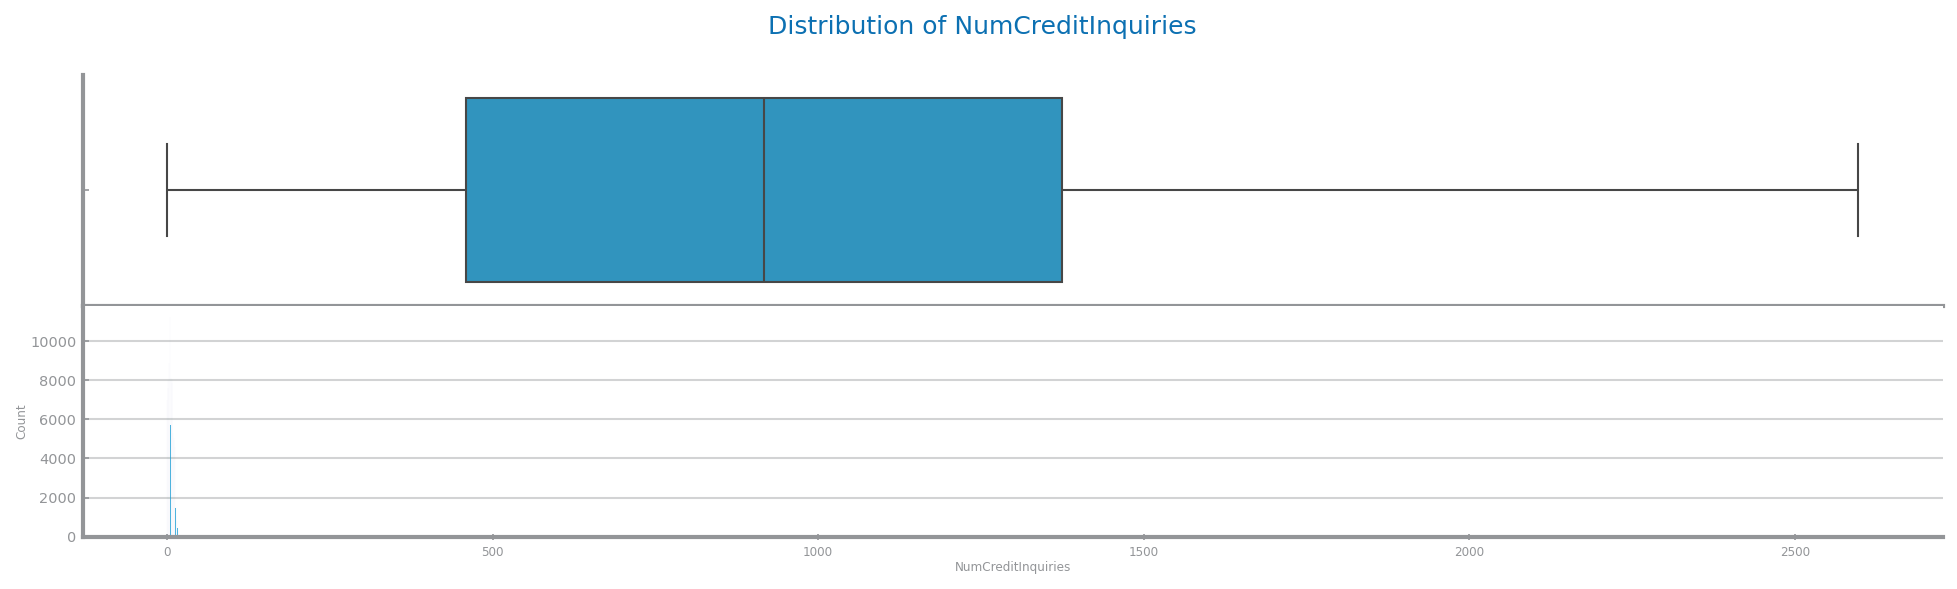

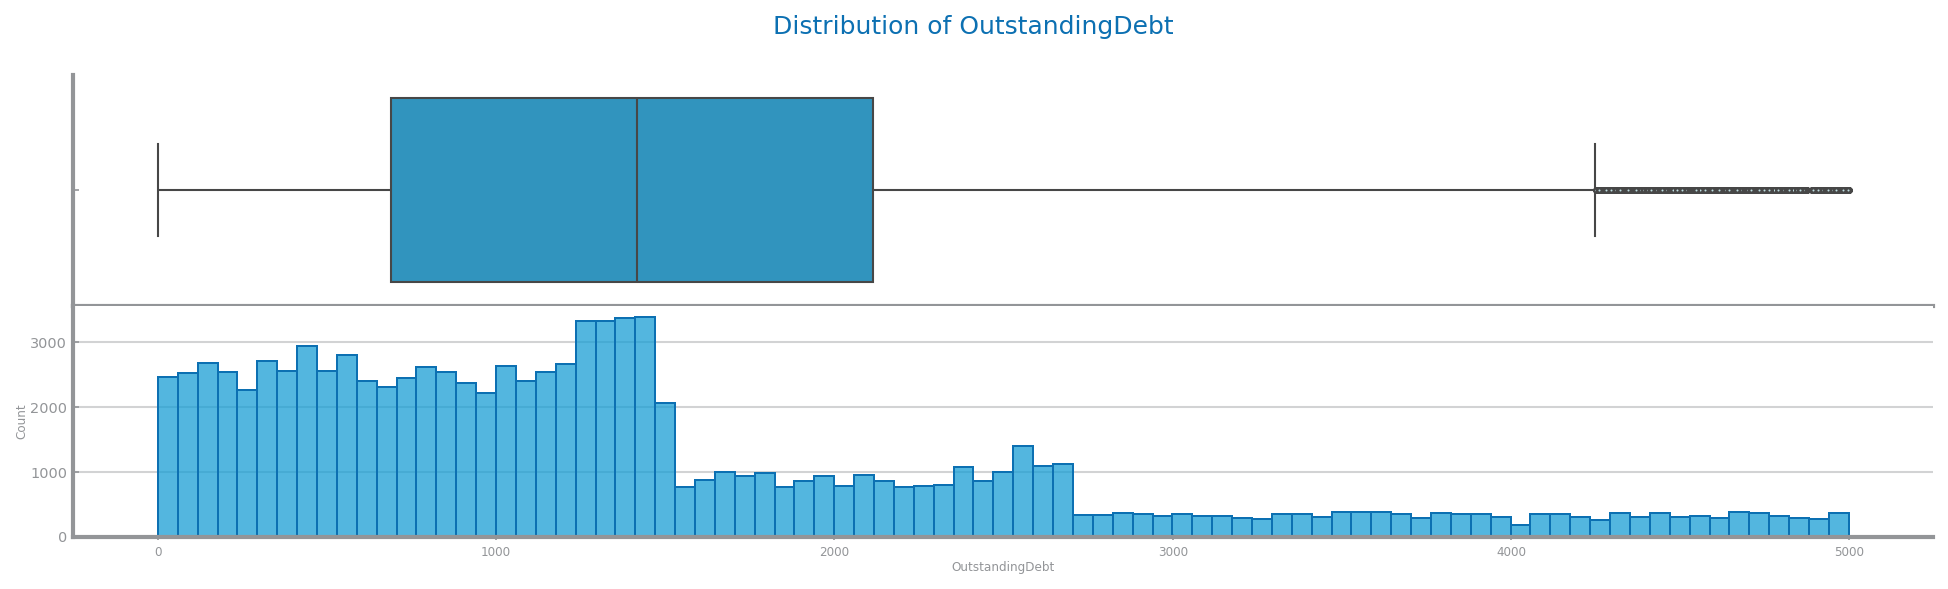

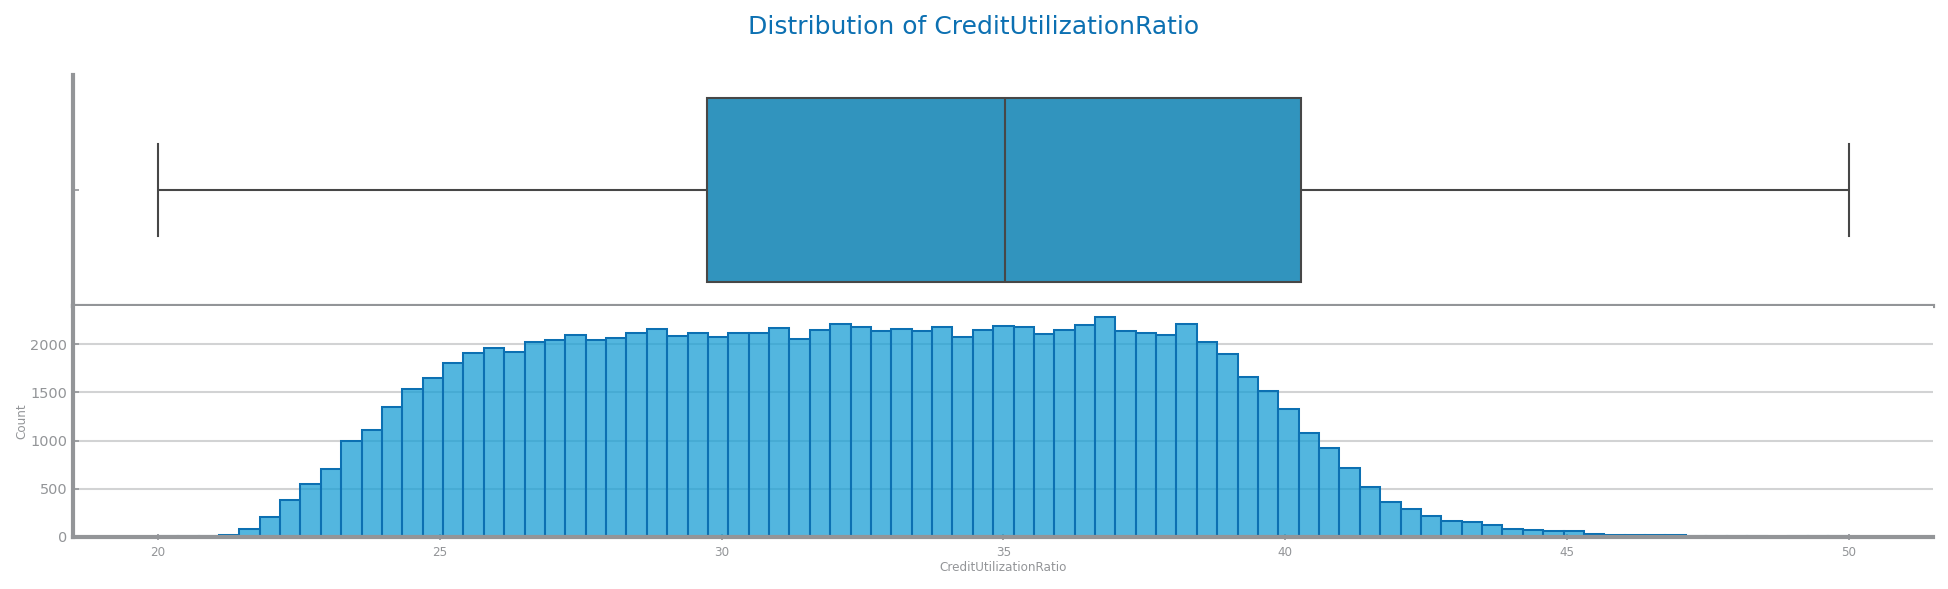

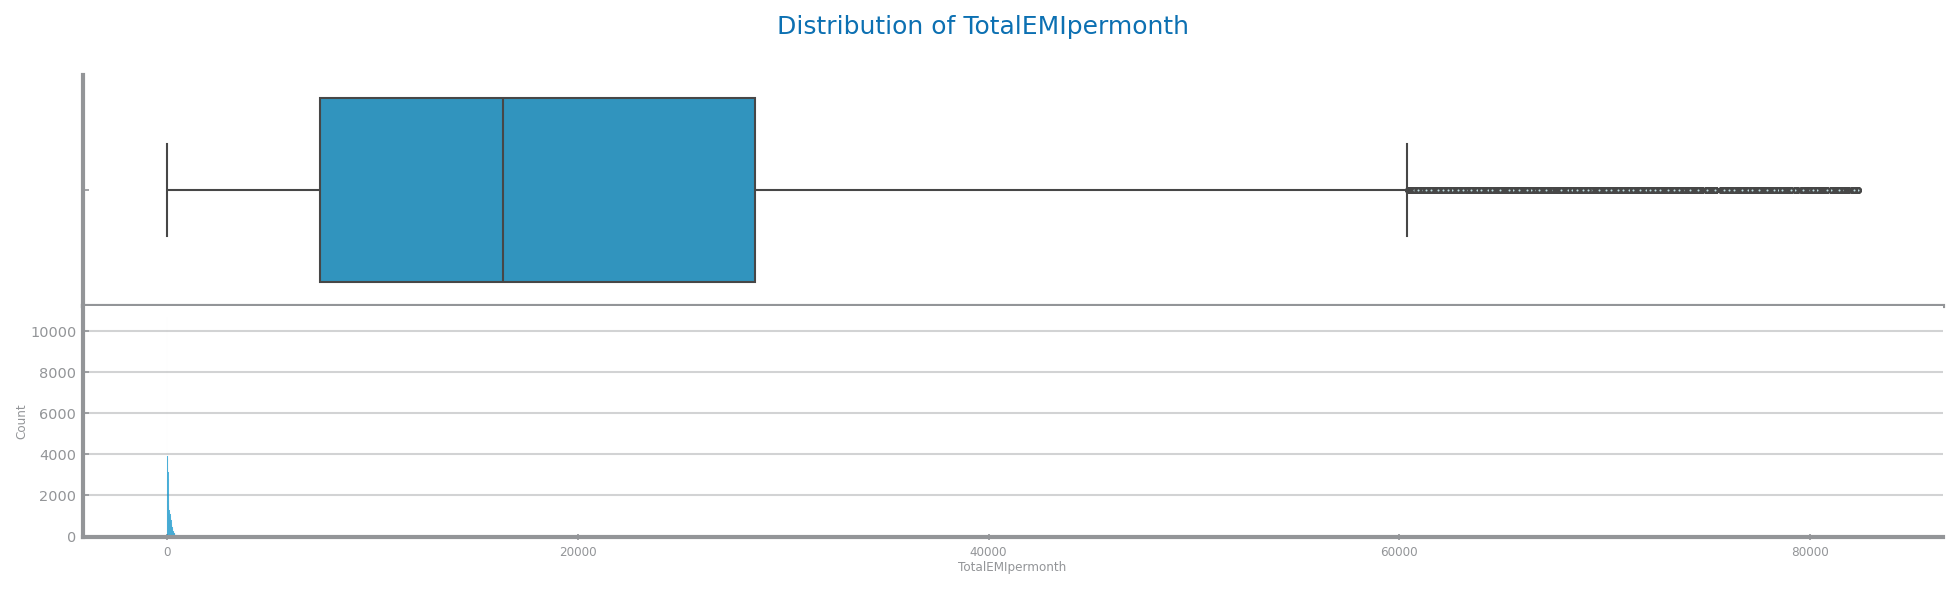

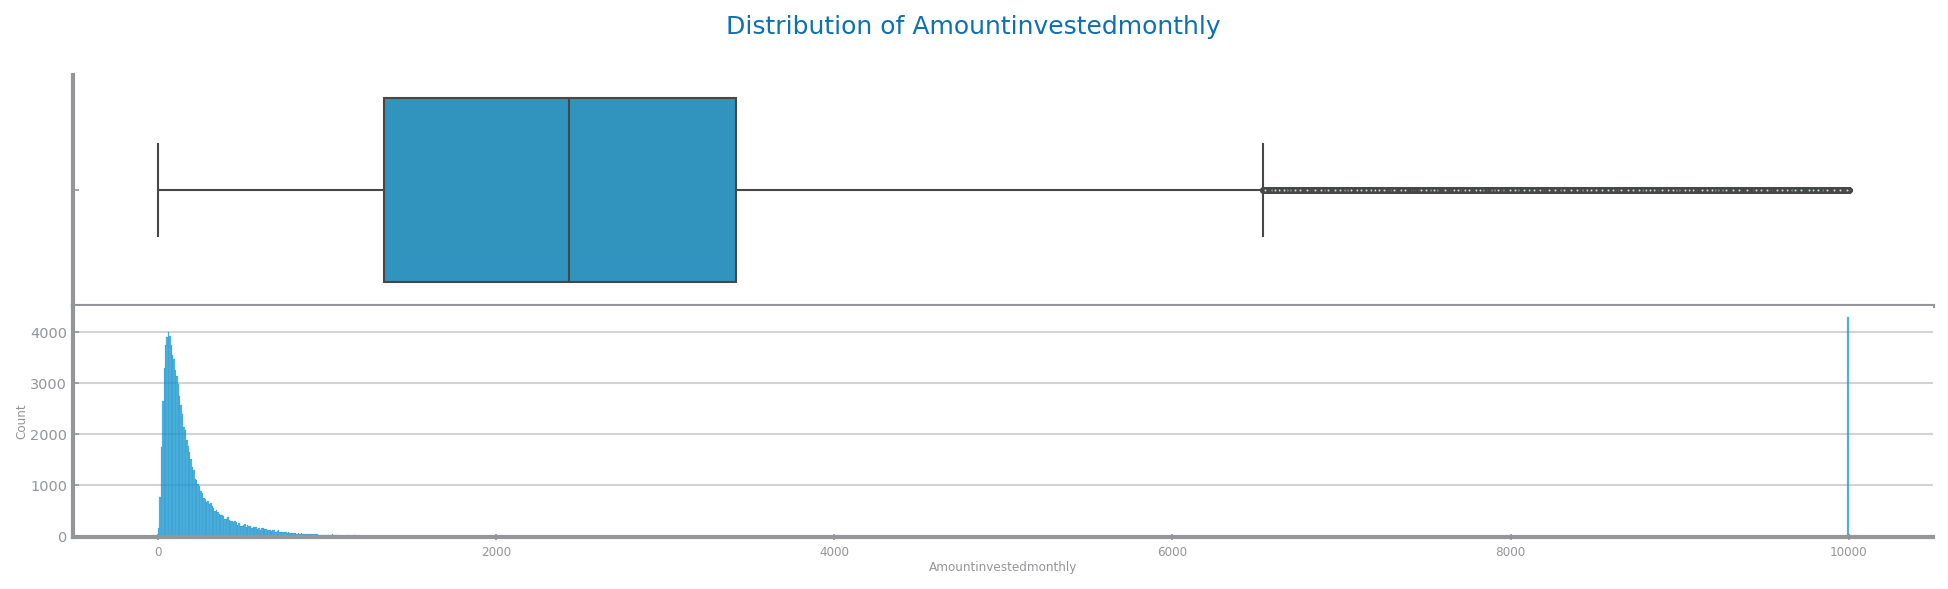

ValueError: Maximum allowed size exceeded

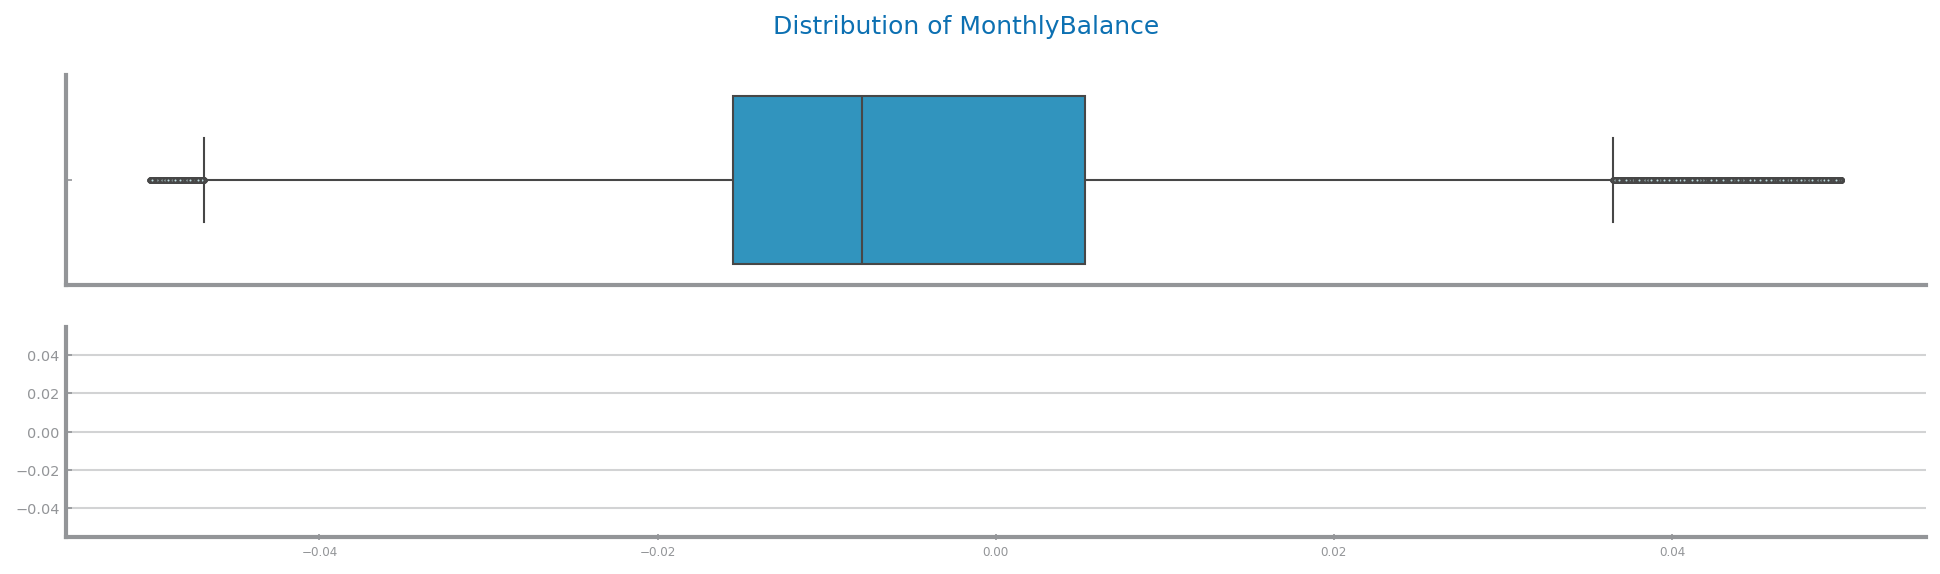

In [47]:
for col in numeric:
  fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16, 4))
  plt.suptitle(f"Distribution of {col}")
  sns.boxplot(data=df3, x=col, ax=ax1)
  ax1.set_xlabel(None)
  ax1.get_xaxis().set_ticks([])
  sns.histplot(data=df, x=col, ax=ax2)
  plt.subplots_adjust(hspace=0)
  print("\n")
  plt.show()